3.3. Для таблично заданной функции путем решения нормальной системы МНК найти приближающие многочлены a) 1-ой  и б) 2-ой степени. Для каждого из приближающих многочленов вычислить сумму квадратов ошибок. Построить графики приближаемой функции и приближающих многочленов.

Вариант 23
|       |            |            |             |           |            |            |
| ----- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- |
| i     | 0          | 1          | 2          | 3          | 4          | 5          |
| X_i   | 0.1        | 0.5        | 0.9        | 1.3        | 1.7        | 2.1        |
| f_i   | 10.0       | 2.0        | 1.1111     | 0.76923    | 0.58824    | 0.47619    |


In [15]:
import typing

In [16]:
X = [0.1, 0.5, 0.9, 1.3, 1.7, 2.1]
F = [10.0, 2.0, 1.1111, 0.76923, 0.58824, 0.47619]

$$ a_0 * (N - 1)  + a_1 * \sum_{j = 1}^{N} x_j = \sum_{j = 1}^{N} y_j $$


$$ a_0 * \sum_{j = 1}^{N} x_j  + a_1 * \sum_{j = 1}^{N} x_j ^ 2 = \sum_{j = 1}^{N}(y_j x_j) $$

In [17]:
A = [[len(X) , sum(X)], [sum(X), sum(x**2 for x in X)]]

In [18]:
B = [sum(F), sum([F[i] * X[i] for i in range(len(X))])]

In [19]:
import numpy as np

def decomposition(A:np.array) -> (np.array, np.array):

  n = len(A)
  L = np.array([[float(i == j) for j in range(n)] for i in range(n)])
  U = A.copy()


  for i in range(n-1):
    for j in range(i+1, n):
      f = - U[j,i]/U[i,i]  
      L[j,i]=-f                      
      U[j,i:n] = U[j,i:n] + f * U[i,i:n]
  return L, U

def solve(A:list, B:list) -> list:
    n = len(B)
    X = [0 for i in range(n)]
    tmp = [0 for i in range(n)]
    L, U = decomposition(np.array(A))

    for i in range(n):
        s = 0
        j = 0
        while j < i:
            if j != i:
                s += tmp[j] * L[i][j]
            j += 1
        tmp[i] = B[i] - s

    i = n - 1
    while i >= 0:
        s = tmp[i]
        j = n - 1
        while j > i:
            s -= U[i][j] * X[j]
            j -= 1
        X[i] = s / U[i][i]
        i -= 1
   
    return X

def F1(x:float, a:list) -> float:
    return a[0] + x * a[1]

def error (F:list, X:list, F1:typing.Callable[[float, list], float], a:list)->float:
    return sum([(F1(X[i], a) - F[i])**2 for i in range(len(X))])

In [20]:
a = solve(A, B)

#### Ошибка

In [21]:
e = error(F, X, F1, a)

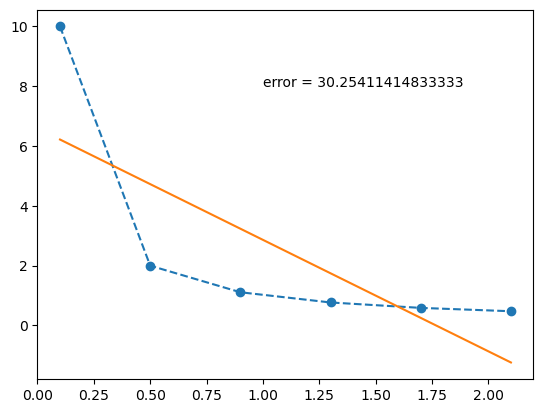

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X, F)
plt.plot(X, F, linestyle='--')
plt.plot(X, [F1(x, a) for x in X])
plt.text(1, 8, 'error = ' + str(e))
plt.show()

In [23]:
print(a)

[6.591923333333331, -3.7282999999999986]


Б

In [24]:
A = [[len(X), sum(X), sum([x**2 for x in X])], 
[sum(X), sum([x**2 for x in X]), sum([x**3 for x in X])], 
[sum([x**2 for x in X]), sum([x**3 for x in X]), sum([x**4 for x in X])]]
B = [sum(F), sum([F[i] * X[i] for i in range(len(X))]), sum([F[i] * X[i]**2 for i in range(len(X))])]

In [25]:
def F2(X:float, a:list) -> float:
    return a[0] + a[1] * X + a[2] * X**2

##### Ошибка

In [26]:
a2 = solve(A, B)
e2 = error(F, X, F2, a2)

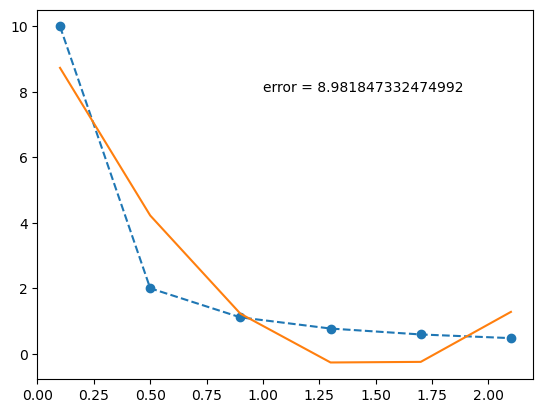

In [27]:
plt.scatter(X, F)
plt.plot(X, F, linestyle='--')
plt.plot(X, [F2(x, a2) for x in X])
plt.text(1, 8, 'error = ' + str(e2))
plt.show()

Коэффициенты многочлен второй степени

In [28]:
print(a2)

[10.098813203124925, -14.107435937499792, 4.717789062499909]
